In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
x_data = np.linspace(0,10,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([ 2.031666  ,  0.64231502,  0.93336287, ...,  0.8403401 ,
       -0.49976862, -0.25753677])

y = mx + b

b =5

In [5]:
y_true = ( 0.5 * x_data ) + 5 + noise      #  to randomize 

In [13]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [14]:
y_df.head()

,Y
0,7.031666
1,5.642320
2,5.933373
3,5.361022
4,4.734586


In [15]:
my_data = pd.concat([x_df,y_df], axis = 1)   # add two columns

In [16]:
my_data.head()

,X Data,Y
0,0.00000,7.031666
1,0.00001,5.642320
2,0.00002,5.933373
3,0.00003,5.361022
4,0.00004,4.734586


In [18]:
my_data.sample(n=250)  #can't p;ot million rows


,X Data,Y
377993,3.779934,8.871287
293295,2.932953,6.064742
988580,9.885810,10.593772
47858,0.478580,7.145153
636465,6.364656,8.595903
592322,5.923226,7.457882
645700,6.457006,8.238202
856811,8.568119,8.544878
752875,7.528758,7.700521
361225,3.612254,7.126985


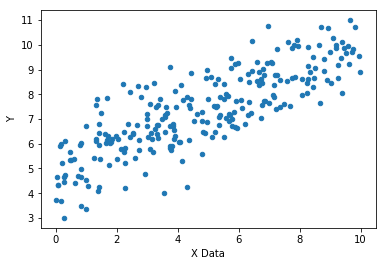

In [19]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

### million rows is too much to pass at once, so we feed data in batches...

In [69]:
batch_size = 16

np.random.randn(2)

array([ 0.53408689,  0.49398705])

In [70]:
m = tf.Variable(0.60)
b = tf.Variable(-0.008)

### Steps

1. Create Variables
2. Create Placeholders
3. Define the graph( operations)
4. Loss function
5. Optimizer to reduce the loss 
6. Initialize the variables and run

In [71]:
xph = tf.placeholder(tf.float32,[batch_size])

In [72]:
yph = tf.placeholder(tf.float32,[batch_size])

In [73]:
y_model = m * xph + b    #graph

In [74]:
#we have to reduce this error
#yph = true value where y_model = predicted value

error = tf.reduce_sum(tf.square(yph - y_model))   #loss function  reducesum of (yph - y_model)**2 


In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [76]:
train = optimizer.minimize(error)

In [77]:
init = tf.global_variables_initializer()

In [84]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size= batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])

model_m and model_b started off as random variables

In [85]:
model_m


0.52686852

In [86]:
model_b

5.0572796

In [87]:
y_hat= x_data * model_m + model_b

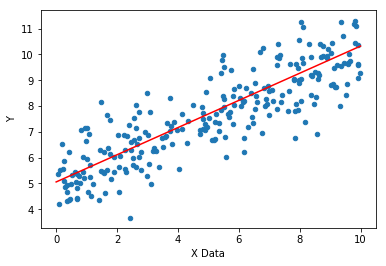

In [92]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

Doing the TEST_TRAIN_SPLIt

# Estimator API ( Keras, Layers, to be used later)